In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
import os

import BSE as bse
bse.verbose = False

print("Imports OK, BSE loaded. verbose =", bse.verbose)

Imports OK, BSE loaded. verbose = False


In [2]:
def make_static_symmetric_schedule(session_length=180,
                                   price_min=90,
                                   price_max=110,
                                   interval=5):
    supply_schedule = [
        {
            'from': 0,
            'to': session_length,
            'ranges': [(price_min, price_max)],
            'stepmode': 'fixed'
        }
    ]

    demand_schedule = [
        {
            'from': 0,
            'to': session_length,
            'ranges': [(price_min, price_max)],
            'stepmode': 'fixed'
        }
    ]

    order_schedule = {
        'sup': supply_schedule,
        'dem': demand_schedule,
        'interval': interval,
        'timemode': 'drip-poisson'
    }

    return order_schedule

In [3]:
def run_single_market(trader_type,
                      n_buyers=10,
                      n_sellers=10,
                      session_length=180):

    order_schedule = make_static_symmetric_schedule(
        session_length=session_length,
        price_min=90,
        price_max=110,
        interval=5
    )

    trader_spec = {
        'buyers':  [(trader_type, n_buyers)],
        'sellers': [(trader_type, n_sellers)],
        'marketmakers': []
    }

    sess_id = f"Q1_{trader_type}_B{n_buyers}_S{n_sellers}_T{session_length}"
    starttime = 0.0
    endtime = float(session_length)

    dumpfile_flags = {
        'dump_tape': False,
        'dump_strats': False,
        'dump_lobs': False,
        'dump_blotters': False,
        'dump_avgbals': True,
        'dump_summary': False
    }

    sess_vrbs = {
        'sess_id': False,
        'books': False,
        'trades': False,
        'orders': False
    }

    _ = bse.market_session(sess_id,
                           starttime,
                           endtime,
                           trader_spec,
                           order_schedule,
                           dumpfile_flags,
                           sess_vrbs)

    avg_file = f"{sess_id}_avg_balance.csv"
    if not os.path.exists(avg_file):
        print(f"Warning: {avg_file} not found, return 0.0")
        return 0.0

    df = pd.read_csv(avg_file, comment='#', header=None)

    if df.shape[0] == 0:
        print(f"Warning: {avg_file} has no rows, return 0.0")
        return 0.0

    df_num = df.apply(pd.to_numeric, errors='coerce')

    df_num = df_num.dropna(axis=1, how='all')

    if df_num.shape[1] == 0:
        print(f"Warning: {avg_file} has no numeric cols, return 0.0")
        return 0.0

    avg_profit = float(df_num.iloc[-1, -1])

    return avg_profit

In [4]:
test_zip = run_single_market('ZIP', n_buyers=2, n_sellers=2, session_length=60)
test_zic = run_single_market('ZIC', n_buyers=2, n_sellers=2, session_length=60)
print("Test ZIP:", test_zip, " Test ZIC:", test_zic)


Q1_ZIP_B2_S2_T60;  
trader=B00 order=None
trader=S00 order=None
trader=S00 order=None
trader=S01 order=None
trader=S01 order=None
trader=S00 order=None
trader=S00 order=None
trader=B01 order=None
trader=S01 order=None
trader=B01 order=None
trader=B00 order=None
trader=S00 order=None
trader=S01 order=None
trader=S01 order=None
trader=B01 order=None
trader=B00 order=None
trader=B01 order=None
trader=S01 order=[S01 Ask P=129 Q=1 T= 4.25 QID:0]
trader=S01 order=[S01 Ask P=129 Q=1 T= 4.50 QID:1]
trader=B00 order=[B00 Bid P=060 Q=1 T= 4.75 QID:2]
trader=B00 order=[B00 Bid P=060 Q=1 T= 5.00 QID:3]
trader=B00 order=[B00 Bid P=060 Q=1 T= 5.25 QID:4]
trader=B01 order=[B01 Bid P=087 Q=1 T= 5.50 QID:5]
trader=S00 order=[S00 Ask P=102 Q=1 T= 5.75 QID:6]
trader=S00 order=[S00 Ask P=102 Q=1 T= 6.00 QID:7]
trader=B01 order=[B01 Bid P=087 Q=1 T= 6.25 QID:8]
trader=B01 order=[B01 Bid P=087 Q=1 T= 6.50 QID:9]
trader=S01 order=[S01 Ask P=116 Q=1 T= 6.75 QID:10]
trader=B01 order=[B01 Bid P=087 Q=1 T= 7.00

In [5]:
def run_experiments(n_runs=10,
                    n_buyers=10,
                    n_sellers=10,
                    session_length=180):

    zip_profits = []
    zic_profits = []

    for i in range(n_runs):
        profit = run_single_market('ZIP',
                                   n_buyers=n_buyers,
                                   n_sellers=n_sellers,
                                   session_length=session_length)
        zip_profits.append(profit)

    for i in range(n_runs):
        profit = run_single_market('ZIC',
                                   n_buyers=n_buyers,
                                   n_sellers=n_sellers,
                                   session_length=session_length)
        zic_profits.append(profit)

    return np.array(zip_profits), np.array(zic_profits)

In [6]:
zip_profits, zic_profits = run_experiments(
    n_runs=10,        
    n_buyers=10,
    n_sellers=10,
    session_length=180
)


Q1_ZIP_B10_S10_T180;  
trader=B05 order=None
trader=S09 order=None
trader=S00 order=None
trader=S08 order=None
trader=S05 order=None
trader=S02 order=None
trader=S08 order=None
trader=S01 order=[S01 Ask P=114 Q=1 T= 0.35 QID:0]
trader=S00 order=None
trader=S04 order=None
trader=B00 order=None
trader=S08 order=None
trader=S01 order=[S01 Ask P=114 Q=1 T= 0.60 QID:1]
trader=S08 order=None
trader=S05 order=None
trader=B06 order=None
trader=S01 order=[S01 Ask P=114 Q=1 T= 0.80 QID:2]
trader=S04 order=None
trader=B03 order=None
trader=B03 order=None
trader=S01 order=[S01 Ask P=114 Q=1 T= 1.00 QID:3]
trader=B04 order=None
trader=S09 order=[S09 Ask P=129 Q=1 T= 1.10 QID:4]
trader=S07 order=None
trader=B06 order=None
trader=B09 order=None
trader=S08 order=[S08 Ask P=134 Q=1 T= 1.30 QID:5]
trader=S05 order=None
trader=B08 order=[B08 Bid P=092 Q=1 T= 1.40 QID:6]
trader=S04 order=None
trader=B06 order=None
trader=B03 order=None
trader=S07 order=None
trader=S00 order=None
trader=S08 order=[S08 Ask

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



trader=B09 order=[B09 Bid P=098 Q=1 T=37.35 QID:682]
trader=B02 order=[B02 Bid P=013 Q=1 T=37.40 QID:683]
trader=S09 order=[S09 Ask P=167 Q=1 T=37.45 QID:684]
trader=S00 order=[S00 Ask P=105 Q=1 T=37.50 QID:685]
trader=B01 order=[B01 Bid P=031 Q=1 T=37.55 QID:686]
trader=B01 order=[B01 Bid P=090 Q=1 T=37.60 QID:687]
trader=S05 order=[S05 Ask P=166 Q=1 T=37.65 QID:688]
trader=B02 order=[B02 Bid P=050 Q=1 T=37.70 QID:689]
trader=B03 order=[B03 Bid P=008 Q=1 T=37.75 QID:690]
trader=B02 order=[B02 Bid P=086 Q=1 T=37.80 QID:691]
trader=B03 order=[B03 Bid P=076 Q=1 T=37.85 QID:692]
trader=S07 order=[S07 Ask P=476 Q=1 T=37.90 QID:693]
trader=S02 order=[S02 Ask P=182 Q=1 T=37.95 QID:694]
trader=B01 order=[B01 Bid P=064 Q=1 T=38.00 QID:695]
trader=B04 order=[B04 Bid P=009 Q=1 T=38.05 QID:696]
trader=S04 order=[S04 Ask P=425 Q=1 T=38.10 QID:697]
trader=B08 order=[B08 Bid P=052 Q=1 T=38.15 QID:698]
trader=S03 order=[S03 Ask P=124 Q=1 T=38.20 QID:699]
trader=B02 order=[B02 Bid P=014 Q=1 T=38.25 QI

In [7]:
print("mean ZIP profit:", zip_profits.mean())
print("mean ZIC profit:", zic_profits.mean())

t_stat, p_two_sided = ttest_ind(zip_profits, zic_profits, equal_var=False)

if t_stat > 0:
    p_one_sided = p_two_sided / 2
else:
    p_one_sided = 1 - p_two_sided / 2

print("t-statistic:", t_stat)
print("one-sided p-value (H1: ZIP > ZIC):", p_one_sided)

mean ZIP profit: 1.1099999999999999
mean ZIC profit: 7.414999999999999
t-statistic: -8.352051650275207
one-sided p-value (H1: ZIP > ZIC): 0.9999999339566191


C:\Users\李佳瑶\AppData\Local\Temp\ipykernel_11772\893751031.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([zip_profits, zic_profits], labels=['ZIP', 'ZIC'])


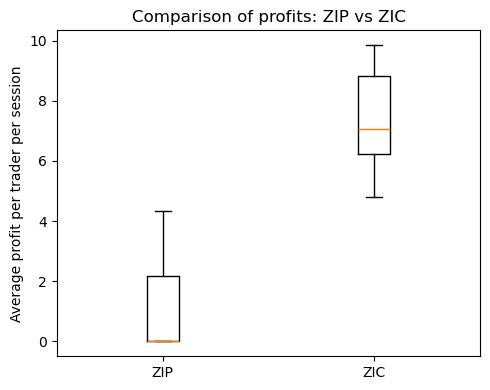

In [8]:
plt.figure(figsize=(5, 4))
plt.boxplot([zip_profits, zic_profits], labels=['ZIP', 'ZIC'])
plt.ylabel("Average profit per trader per session")
plt.title("Comparison of profits: ZIP vs ZIC")
plt.tight_layout()
plt.show()